In [16]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from random import randint

In [135]:
# extract weights
f = open("model_weights.txt", "r")
output = f.readlines()

weights = []

print(np.array(output[11].split(" ")).astype(np.float32))

for i, a in enumerate(output):
    l = len(a.split(" ")) 
    if l == 1: continue
    print(i, l)
    ws = np.array(a.split(" ")).astype(np.float32)
    weights.append(ws)
    
len(weights[5]), weights[5][0:5]

[-0.28466603  0.21197046 -0.11965785 -0.12151188 -0.04327588  0.19770963
 -0.21109436 -0.09403622 -0.10058617 -0.08626349]
1 50176
3 64
5 2048
7 32
9 320
11 10


(10,
 array([-0.28466603,  0.21197046, -0.11965785, -0.12151188, -0.04327588],
       dtype=float32))

In [189]:
def ReLU(x): 
    return np.maximum(0, x)

def Linear(x: np.array, w: np.array, bias: np.array):
    return x.dot(w.T) + bias

def Log_Softmax(x: np.array, axis=1):
    x_off = x - np.max(x, axis=axis, keepdims=True)
    return x_off - np.log(np.sum(np.exp(x_off), axis=axis, keepdims=True))

In [199]:
class mymodel:
    def __init__(self, w):
        self.weights = w # extract from file
        
    def forward(self, x: np.array):
        # nn
        x = x.flatten()
        x = Linear(x, self.weights[0].reshape(64, 784), self.weights[1])
        x = ReLU(x)
        x = Linear(x, self.weights[2].reshape(32, 64), self.weights[3])
        x = ReLU(x)
        # classifier
        x = Linear(x, self.weights[4].reshape(10, 32), self.weights[5])
        print(x)
        x = np.expand_dims(x, axis=0)
        x = Log_Softmax(x,axis=1)
        print(x)
        
        return x
    
model = mymodel(weights)

(28, 28)
[ -3.887824   -5.2016077  -5.418783    7.6474347 -10.556103   19.240984
  -4.3270144  -1.9381679   7.7244835   2.0919135]
[[-2.3128826e+01 -2.4442612e+01 -2.4659786e+01 -1.1593569e+01
  -2.9797106e+01 -1.9192512e-05 -2.3568018e+01 -2.1179171e+01
  -1.1516520e+01 -1.7149090e+01]]


(array([[-2.3128826e+01, -2.4442612e+01, -2.4659786e+01, -1.1593569e+01,
         -2.9797106e+01, -1.9192512e-05, -2.3568018e+01, -2.1179171e+01,
         -1.1516520e+01, -1.7149090e+01]], dtype=float32),
 5)

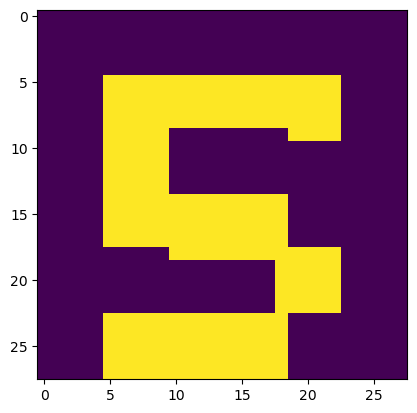

In [202]:
from PIL import Image

lol = np.array([[0,0,0,0,0,0],
               [0,1,1,1,1,0],
               [0,1,0,0,0,0],
               [0,1,1,1,0,0],
               [0,0,0,0,1,0],
               [0,1,1,1,0,0]])
lol = np.array(Image.fromarray(lol.astype(np.uint8)).resize((28, 28))).astype('float32')
plt.imshow(lol)
print(lol.shape)

#print(model.forward(lol)
p = model.forward(lol)
p, p.argmax()

In [198]:
z = np.zeros(784).astype(np.float32)
model.forward(z)

[-1.2063076   1.1663454  -0.26651192 -0.5140997   0.07032581  1.5604371
 -0.20676681  0.45540154 -1.0227805  -0.22400329]
[[-3.8635068 -1.490854  -2.9237113 -3.171299  -2.5868735 -1.0967623
  -2.8639662 -2.201798  -3.6799798 -2.8812027]]


array([[-3.8635068, -1.490854 , -2.9237113, -3.171299 , -2.5868735,
        -1.0967623, -2.8639662, -2.201798 , -3.6799798, -2.8812027]],
      dtype=float32)